In [1]:
cd /home/kakw/efake/WG_Analysis/Plotting

/home/kakw/efake/WG_Analysis/Plotting


In [2]:
 %run interactiveStackTree.py --baseDir  /data/users/kakw/Resonances/LepGamma_elg_newblind_2018_09_23_beta \
--samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py \
--lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root --jupyt --quiet

Welcome to JupyROOT 6.10/05
-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
DYJetsToLL_M-50                xsec : 5.77e+03 pb Nevent : 49144274 lumi : 8.52e+03 scale :     4.21
ZGTo2LG                        xsec :      118 pb Nevent : 9321494  lumi : 7.91e+04 scale :    0.454
TTJets_DiLept                  xsec :     85.7 pb Nevent : 6094476  lumi : 7.11e+04 scale :    0.505
TTJets_SingleLeptFromT         xsec :      179 pb Nevent : 11957043 lumi : 6.69e+04 scale :    0.537
TTJets_SingleLeptFromTbar      xsec :      179 pb Nevent : 46455353 lumi :  2.6e+05 scale :    0.138
TTGJets                        xsec :      3.7 pb Nevent : 1577833  lumi : 4.27e+05 scale :   0.0841
WWTo2L2Nu                      xsec :     12.2 pb Nevent : 1        lumi :   0.0821 scale : 4.37e+05
WGToLNuG-amcatnloFXFX          xsec :      822 pb Nevent : 3235156  lumi : 3.94e+03 scale :     9.12
WGToLNuG-madgraphMLM           xsec :      405 pb Nevent : 6103

In [3]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
base1 = 'ph_n==1 && el_n==1'
base1eta = base1 + ' && ph_IsEB[0]'
passpix = '&& ph_hasPixSeed[0]==0'  #Pixel seed
failpix = '&& ph_hasPixSeed[0]==1'
passcsev = '&& ph_passEleVeto[0]==1' #CSEV
failcsev = '&& ph_passEleVeto[0]==0' 
ltmet = '&&met_pt<25'
gtmet = '&&met_pt>25'
phpt50 = "&&ph_pt[0]>50"
unblind = "ph_hasPixSeed[0]==1 || met_pt<25"
weight = "PUWeight*NLOWeight"

In [4]:
from math import sqrt

In [5]:
samples.deactivate_all_samples()
samples.activate_sample(["Z+jets"])#,"Zgamma"])

Activate sample Z+jets


In [6]:
samples.Draw("m_lep_ph",base1eta+passpix+"&&ph_pt[0]>0&&ph_pt[0]<30",(200,0,200),
             {"xlabel":"m(e,#gamma) " , "weight": weight})
h1 = samples.get_samples(name='__AllStack__')[0].hist.Clone()
#h1.Scale(1./h1.Integral())

m_lep_ph : ph_n==1 && el_n==1 && ph_IsEB[0]&& ph_hasPixSeed[0]==0&&ph_pt[0]>0&&ph_pt[0]<30
stack_sum 67410.9099232


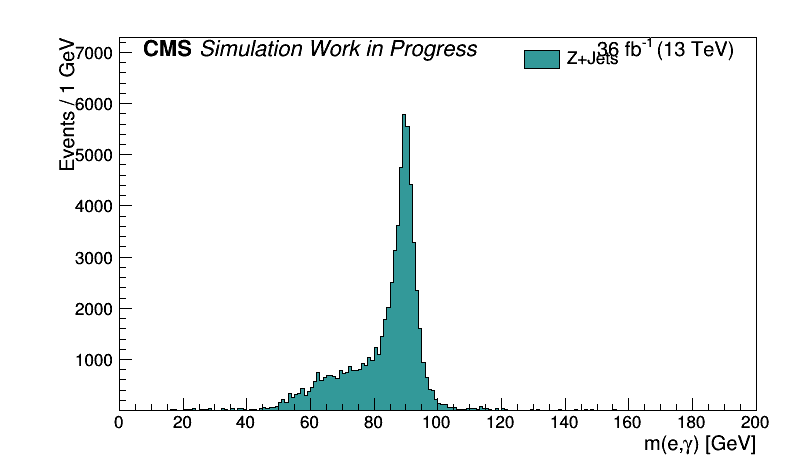

In [7]:
samples.curr_canvases["base"].Draw()

In [8]:
samples.Draw("m_lep_ph",base1eta+"&&ph_pt[0]>80",(300,0,300),
             {"xlabel":"m(e,#gamma) " , "weight": weight,"logy":1})
h1 = samples.get_samples(name='__AllStack__')[0].hist.Clone()
#h1.Scale(1./h1.Integral())

m_lep_ph : ph_n==1 && el_n==1 && ph_IsEB[0]&&ph_pt[0]>80
stack_sum 27852.7680712


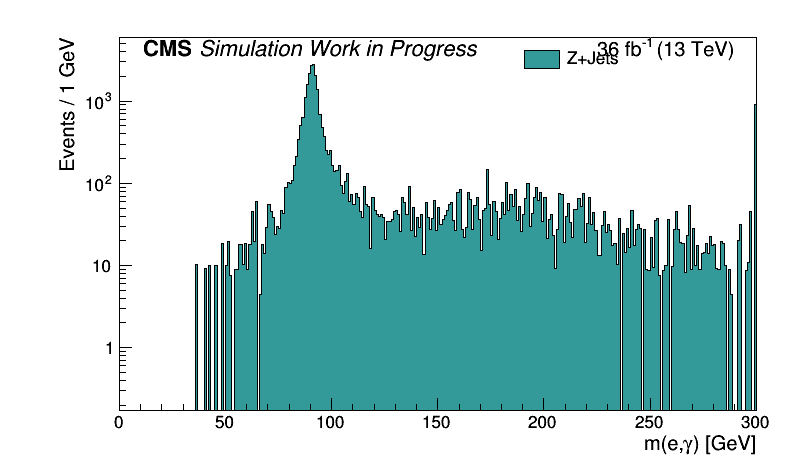

In [9]:
samples.curr_canvases["base"].Draw()

In [ ]:
c=ROOT.TCanvas()
h1.Draw()

In [ ]:
h1.GetNbinsX()

In [ ]:
for i in range(h1.GetNbinsX()):
    err = h1.GetBinError(i+1)
    print i+1, err, sqrt(err*err+100)
    h1.SetBinError(i+1,sqrt(err*err+100))

In [ ]:
%jsroot
c.Draw()

In [ ]:
samples.Draw("PUWeight",base1eta+passpix+"&&ph_pt[0]>0&&ph_pt[0]<30"+"&&m_lep_ph>172&&m_lep_ph<173",(200,0,1),
             {"xlabel":"m(e,#gamma) " })
h1 = samples.get_samples(name='__AllStack__')[0].hist.Clone()
#h1.Scale(1./h1.Integral())

In [ ]:
c=ROOT.TCanvas()
h1.Draw()

In [ ]:
%jsroot 
c.Draw()

In [ ]:
x = ROOT.RooRealVar("x","x",0,200,"GeV")
x2 = ROOT.RooRealVar("x","reco mass [GeV]",0,200,"GeV")

In [10]:
loaded = ROOT.gROOT.ProcessLineSync(".x DoubleCB.cxx+") 

(DoubleCB) Name:  Title: 


Info in <TUnixSystem::ACLiC>: creating shared library /home/kakw/efake/WG_Analysis/Plotting/./DoubleCB_cxx.so


In [11]:
loaded = ROOT.gROOT.ProcessLineSync(".x DoubleCBOrig.cxx+") 

(DoubleCBOrig) Name:  Title: 


In [12]:
wk = ROOT.RooWorkspace("doublecb") 
wk.factory("DoubleCB::pdf(x[70,195],dcb_mass[90,80,100],dcb_sigma[1,0.1,100],"
           "dcb_alpha1[1,0,10],dcb_power1[2,0,10],dcb_alpha2[1,0,10],dcb_power2[2,0,10])")


<ROOT.DoubleCB object ("pdf") at 0x5bdbaa0>

In [13]:
func_pdf = wk.pdf("pdf")


In [ ]:
### for trying out division in parametrization
#wk.factory("DoubleCB::pdfnew2(x[70,195],dcb_mass[90,80,100],dcb_sigma[1,0.1,100],"
#           "dcb_alpha1[1,0,10],dcb_power1[1,0,10]/dcb_alpha1[2,0,10],dcb_alpha2[1,0,10],dcb_power2[1,0,10]/dcb_alpha2[2,0,10])")


In [14]:
wk.factory("DoubleCB::pdfnew(x[70,195],dcbo_mass[86,80,100],dcbo_sigma[9.5,0.1,100],"
           "dcbo_alpha1[0.2,0,10],dcbo_power1[33.5,0,100],dcbo_alpha2[1.6,0,10],dcbo_power2[3.57,0,10])")

<ROOT.DoubleCB object ("pdfnew") at 0x7a9a650>

[#1] INFO:ObjectHandling -- RooWorkSpace::import(doublecb) Recycling existing object x created with identical factory specification


In [15]:
wk.Print()



RooWorkspace(doublecb) doublecb contents

variables
---------
(dcb_alpha1,dcb_alpha2,dcb_mass,dcb_power1,dcb_power2,dcb_sigma,dcbo_alpha1,dcbo_alpha2,dcbo_mass,dcbo_power1,dcbo_power2,dcbo_sigma,x)

p.d.f.s
-------
DoubleCB::pdf[ m=x m0=dcb_mass sigma=dcb_sigma alpha1=dcb_alpha1 n1=dcb_power1 alpha2=dcb_alpha2 n2=dcb_power2 ] = 0.00128214
DoubleCB::pdfnew[ m=x m0=dcbo_mass sigma=dcbo_sigma alpha1=dcbo_alpha1 n1=dcbo_power1 alpha2=dcbo_alpha2 n2=dcbo_power2 ] = 0.0185761



In [16]:
func_pdfnew = wk.pdf("pdfnew")


In [17]:
func_pdfnew.getVal()

0.0185761379113375

In [18]:
func_pdf.getVal()

0.0012821364189988288

In [19]:
x = wk.var("x")

In [20]:
datahist = ROOT.RooDataHist( 'datahist', 'data',                                                                                            
                         ROOT.RooArgList(x), h1 )

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(datahist): fit range of variable x expanded to nearest bin boundaries: [70,195] --> [70,195]


In [ ]:
canvas = ROOT.TCanvas("cfit","Fitter",800,500)
frame = x.frame(RooFit.Title("here is title"))
datahist.plotOn(frame)
func_pdf.plotOn( frame,RooFit.LineColor(2),RooFit.NormRange('myrange'),ROOT.RooFit.Range(60,190))
func_pdfnew.plotOn( frame,RooFit.LineColor(4),RooFit.NormRange('myrange'),ROOT.RooFit.Range(60,190))
frame.Draw()
canvas.SetLogy(1)

In [ ]:
%jsroot
canvas.Draw()

In [ ]:
frm = x.frame()
func_pdf.fitTo(datahist,ROOT.RooFit.Range(60,190),ROOT.RooFit.SumW2Error(True))
func_pdfnew.fitTo(datahist,ROOT.RooFit.Range(60,190),ROOT.RooFit.SumW2Error(True))

In [ ]:
canvas = ROOT.TCanvas("cfit","Fitter",800,500)
frame = x.frame(RooFit.Title("here is title"))
datahist.plotOn(frame)
func_pdf.plotOn( frame,RooFit.LineColor(2),RooFit.NormRange('myrange'),ROOT.RooFit.Range(60,190))
func_pdfnew.plotOn( frame,RooFit.LineColor(4),RooFit.NormRange('myrange'),ROOT.RooFit.Range(60,190))
frame.Draw()
frame.SetMaximum(1e5)
frame.SetMinimum(1)
canvas.SetLogy(1)

In [ ]:
%jsroot
canvas.Draw()

RooPlot* frame1 = y.frame(Title("Compiled class MyPdfV3")) ;
RooDataSet* data = pdf->generate(y,1000) ;
pdf->fitTo(*data) ;
data->plotOn(frame1) ;
pdf->plotOn(frame1) ;

In [ ]:
frame.chiSquare(6)

In [ ]:
hresid = frame.residHist()
frame2 = x.frame(RooFit.Title("Residual Distribution")) 
frame2.addPlotable(hresid,"P")
frame2.Draw()
#frame.SetMaximum(10)
#frame.SetMinimum(-10)
canvas.SetLogy(0)

In [ ]:
canvas.Draw()

In [ ]:
hpull = frame.pullHist()
frame3 = x.frame(RooFit.Title("pull Distribution")) 
frame3.addPlotable(hpull,"P")
frame3.SetYTitle("Pull")
frame3.Draw()

In [ ]:
latex = ROOT.TLatex()
latex.DrawLatex(20,0,"#chi^{2}=250")
latex.DrawLatexNDC(0.15,.8,"(.1,.5)")
latex.SetTextSize(0.05)
latex.Draw()
line = ROOT.TLine(0,0,210,0)
line.SetLineStyle(3)
line.SetLineWidth(2)
line.Draw()

In [ ]:
canvas.Draw()

In [ ]:
from array import array

In [ ]:
tod = lambda x : array("d",x)

In [ ]:
tg = ROOT.TGraphErrors(4,tod([1,2,3,4]),tod([2,3,4,5]))

In [ ]:
tg.Draw("AL")

In [ ]:
line = ROOT.TLine(1,3,4.5,3)
line.SetLineStyle(3)
line.SetLineWidth(2)
line.SetLineColor(2)
line.Draw()

In [ ]:
canvas.Draw()

In [ ]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

In [ ]:
!bash /home/kakw/forjupyter/jupyterconvert.sh /home/kakw/public_html {nb_name}